<a href="https://colab.research.google.com/github/Prasenjit10/ML-ASSIGNMENTS/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import pandas as pd
dataset = pd.read_csv("housing_price_dataset.csv")

# Display basic info
print(dataset.head())

   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Eli

In [20]:
# Feature and Target Selection
X = dataset[[
    "Avg. Area Income",
    "Avg. Area House Age",
    "Avg. Area Number of Rooms",
    "Avg. Area Number of Bedrooms",
    "Area Population"
]]
y = dataset["Price"]

In [21]:
from sklearn.model_selection import train_test_split
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# Lasso Regression with Grid Search
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
lasso = Lasso(max_iter=10000, random_state=42)
pipe_lasso = Pipeline([
    ("scaler", StandardScaler()),
    ("model", lasso)
])
param_grid_lasso = {
    "model__alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10]
}
grid_lasso = GridSearchCV(pipe_lasso, param_grid_lasso, cv=5, scoring='r2', n_jobs=-1)
grid_lasso.fit(X_train, y_train)

best_lasso = grid_lasso.best_estimator_
y_pred_lasso = best_lasso.predict(X_test)

In [22]:
# Ridge Regression with Grid Search

ridge = Ridge(max_iter=10000, random_state=42)
pipe_ridge = Pipeline([
    ("scaler", StandardScaler()),
    ("model", ridge)
])
param_grid_ridge = {
    "model__alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10]
}
grid_ridge = GridSearchCV(pipe_ridge, param_grid_ridge, cv=5, scoring='r2', n_jobs=-1)
grid_ridge.fit(X_train, y_train)

best_ridge = grid_ridge.best_estimator_
y_pred_ridge = best_ridge.predict(X_test)

In [23]:
# Model Evaluation Function
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
def evaluate_model(model_name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"\n{model_name} Evaluation:")
    print(f"  R² Score : {r2:.4f}")
    print(f"  MSE      : {mse:.2f}")
    print(f"  RMSE     : {rmse:.2f}")
    print(f"  MAE      : {mae:.2f}")

In [24]:
# Evaluate both models
evaluate_model("Lasso Regression", y_test, y_pred_lasso)
evaluate_model("Ridge Regression", y_test, y_pred_ridge)


Lasso Regression Evaluation:
  R² Score : 0.9180
  MSE      : 10089007632.23
  RMSE     : 100444.05
  MAE      : 80879.09

Ridge Regression Evaluation:
  R² Score : 0.9180
  MSE      : 10089007981.52
  RMSE     : 100444.05
  MAE      : 80878.96


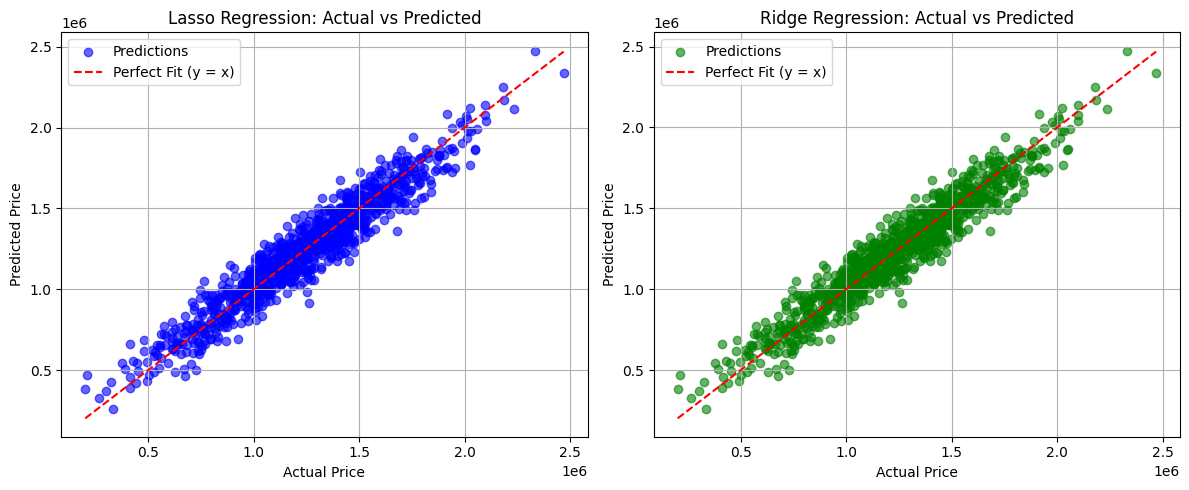

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))

# Lasso Regression Plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lasso, color='blue', alpha=0.6, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', linestyle='--', label='Perfect Fit (y = x)')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Lasso Regression: Actual vs Predicted")
plt.legend()
plt.grid(True)

# Ridge Regression Plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_ridge, color='green', alpha=0.6, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', linestyle='--', label='Perfect Fit (y = x)')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Ridge Regression: Actual vs Predicted")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()